# Assignment Part-I


# importing libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import xgboost

In [11]:
from scipy.stats import shapiro
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Lasso
from math import ceil
from scipy.stats import skew
from itertools import product, chain
from sklearn.preprocessing import StandardScaler

# Load Datasets

In [12]:
# Reading files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Exploratory Data Analysis

In [13]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
display(train.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
display(test.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [16]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Checking nulls

In [17]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    nulls = df.apply(lambda x: x.isnull().sum())
    counts = df.apply(lambda x: x.count())
    distincts = df.apply(lambda x: x.unique().shape[0])
    uniques = df.apply(lambda x: [x.unique()])
    
    
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape is', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)
    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ] 
    str.columns = cols
    dtypes = str.types.value_counts()
    print('\nData types are as follows\n',str.types.value_counts())
    return str

In [18]:
details = rstr(train, 'SalePrice')
display(details.sort_values(by='corr SalePrice', ascending=False))

Data shape is (1460, 81)

Data types are as follows
 object     43
int64      35
float64     3
Name: types, dtype: int64


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr SalePrice
SalePrice,int64,1460,663,0,0.000000,"[[208500, 181500, 223500, 140000, 250000, 1430...",1.882876,6.536282,1.000000
OverallQual,int64,1460,10,0,0.000000,"[[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]]",0.216944,0.096293,0.790982
GrLivArea,int64,1460,861,0,0.000000,"[[1710, 1262, 1786, 1717, 2198, 1362, 1694, 20...",1.366560,4.895121,0.708624
GarageCars,int64,1460,5,0,0.000000,"[[2, 3, 1, 0, 4]]",-0.342549,0.220998,0.640409
GarageArea,int64,1460,441,0,0.000000,"[[548, 460, 608, 642, 836, 480, 636, 484, 468,...",0.179981,0.917067,0.623431
...,...,...,...,...,...,...,...,...,...
PoolQC,object,7,4,1453,99.520548,"[[nan, Ex, Fa, Gd]]",NaN,NaN,NaN
Fence,object,281,5,1179,80.753425,"[[nan, MnPrv, GdWo, GdPrv, MnWw]]",NaN,NaN,NaN
MiscFeature,object,54,5,1406,96.301370,"[[nan, Shed, Gar2, Othr, TenC]]",NaN,NaN,NaN
SaleType,object,1460,9,0,0.000000,"[[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con,...",NaN,NaN,NaN


In [20]:
newtrain = train.shape[0]
newtest = test.shape[0]
y_train = train.SalePrice.values
entire_data = pd.concat((train, test)).reset_index(drop=True)

print("Entire data has {0} rows and {1} columns".format(entire_data.shape[0], entire_data.shape[1]))
details = rstr(entire_data)
print("Entire data ha {1:2.2%} of null at {0} features".format(details[details.nulls>0].shape[0], 
                                                   details.nulls[details.nulls>0].sum()/entire_data.size))
print('\nMissing ratio table-')
display(details.loc[(details.nulls>0), 'types':'uniques'].sort_values(by= 'missing ration', ascending=False))

C:\Users\Farzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


Entire data has 2919 rows and 81 columns
Data shape is (2919, 81)

Data types are as follows
 object     43
int64      26
float64    12
Name: types, dtype: int64
Entire data ha 6.52% of null at 35 features

Missing ratio table-


C:\Users\Farzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,types,counts,distincts,nulls,missing ration,uniques
PoolQC,object,10,4,2909,99.657417,"[[nan, Ex, Fa, Gd]]"
MiscFeature,object,105,5,2814,96.402878,"[[nan, Shed, Gar2, Othr, TenC]]"
Alley,object,198,3,2721,93.216855,"[[nan, Grvl, Pave]]"
Fence,object,571,5,2348,80.438506,"[[nan, MnPrv, GdWo, GdPrv, MnWw]]"
SalePrice,float64,1460,664,1459,49.982871,"[[208500.0, 181500.0, 223500.0, 140000.0, 2500..."
FireplaceQu,object,1499,6,1420,48.646797,"[[nan, TA, Gd, Fa, Ex, Po]]"
LotFrontage,float64,2433,129,486,16.649538,"[[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, na..."
GarageFinish,object,2760,4,159,5.447071,"[[RFn, Unf, Fin, nan]]"
GarageQual,object,2760,6,159,5.447071,"[[TA, Fa, Gd, nan, Ex, Po]]"
GarageYrBlt,float64,2760,104,159,5.447071,"[[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993..."


# Box plot overallqual/salePrice

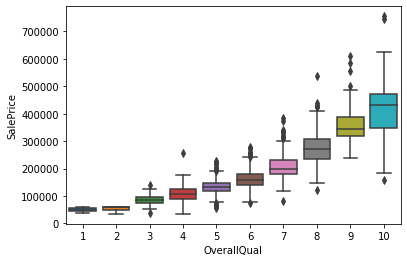

In [21]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])

# GrLivArea vs SalePrice plot

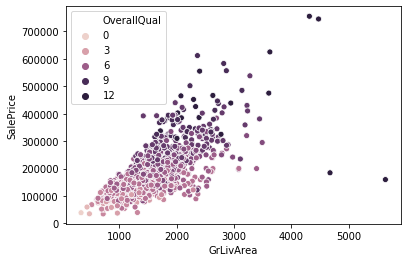

In [22]:
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, hue=train.OverallQual)

#  GarageCars vs SalePrice plot

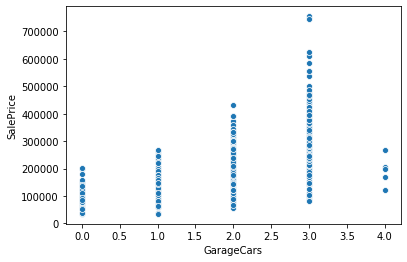

In [23]:
sns.scatterplot(x = train.GarageCars, y = train.SalePrice)

#  GarageArea vs SalePrice plot

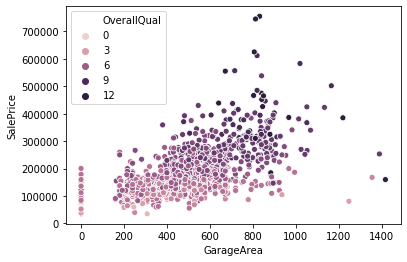

In [24]:
sns.scatterplot(x = train.GarageArea, y = train.SalePrice, hue=train.OverallQual)

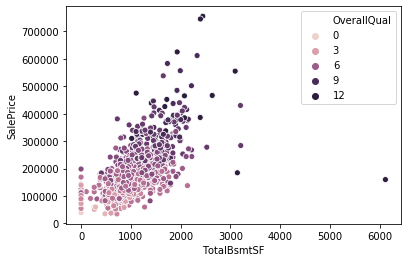

In [25]:
sns.scatterplot(y = train.SalePrice , x = train.TotalBsmtSF, hue=train.OverallQual)


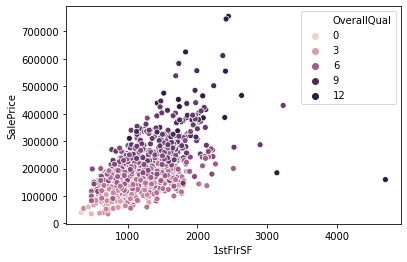

In [26]:
sns.scatterplot(y = train.SalePrice, x = train['1stFlrSF'], hue=train.OverallQual)

# Checking distribution of prices and log(prices)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019161F3EB48>,
      dtype=object)

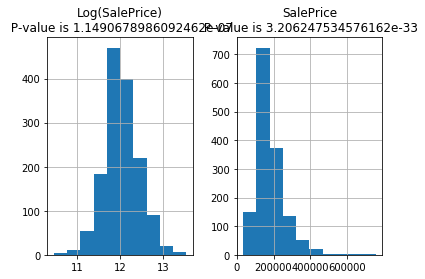

In [27]:
p_value_before = shapiro(train["SalePrice"])[1]
p_value_after = shapiro(np.log(train["SalePrice"]))[1]
graph_data = pd.DataFrame(
        {
            ("SalePrice\n P-value is " + str(p_value_before)) : train["SalePrice"],
            ("Log(SalePrice)\n P-value is " + str(p_value_after)) : np.log(train["SalePrice"])
        }
    )
graph_data.hist()

# log transform SalePrice as it is approximately normal which would likely improve performance of the model significantly.

In [28]:
train["SalePrice"] = np.log(train["SalePrice"])

In [29]:
# Combining train and test data for feature engg
data = pd.concat((train.loc[:, 'MSSubClass':'SaleCondition'],
                  test.loc[:, 'MSSubClass':'SaleCondition']), ignore_index=True)

# MSSubClass- although being numerical values but it represents categories here

In [30]:
ChkMSSubClass = data.MSSubClass.replace(
    {
        20: 1, 30: 0, 40: 0, 45: 0, 50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0, 90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0
    }
)
data["ChkMSSubClass"] = ChkMSSubClass

data = data.replace(
    {
        'MSSubClass': { 20: 'MSSubClass_20', 30: 'MSSubClass_30', 40: 'MSSubClass_40', 45: 'MSSubClass_45', 50: 'MSSubClass_50', 60: 'MSSubClass_60', 70: 'MSSubClass_70', 75: 'MSSubClass_75', 80: 'MSSubClass_80', 85: 'MSSubClass_85', 90: 'MSSubClass_90', 120: 'MSSubClass_120', 150: 'MSSubClass_150', 160: 'MSSubClass_160', 180: 'MSSubClass_180', 190: 'MSSubClass_190'
        }
    }
)

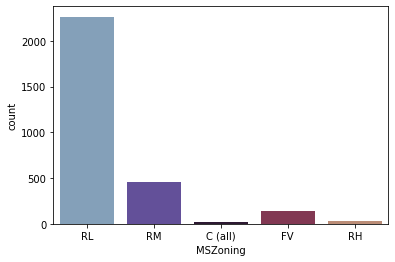

In [31]:
# Treating missing values to mode 

sns.countplot(x='MSZoning', data=data,palette="twilight")
data.loc[data.MSZoning.isnull(), 'MSZoning'] = data.loc[:, 'MSZoning'].mode()[0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001916208A448>,
      dtype=object)

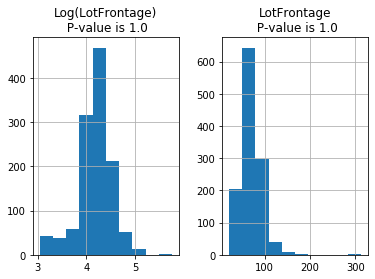

In [32]:
# Checking distribution of prices and log(LotFrontage)

p_value_before = shapiro(train["LotFrontage"])[1]
p_value_after = shapiro(np.log(train["LotFrontage"]))[1]
graph_data = pd.DataFrame(
        {
            ("LotFrontage\n P-value is " + str(p_value_before)) : train["LotFrontage"],
            ("Log(LotFrontage)\n P-value is " + str(p_value_after)) : np.log(train["LotFrontage"])
        }
    )
graph_data.hist()

# there is no improvement in the p values so letting it be

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019162092248>,
      dtype=object)

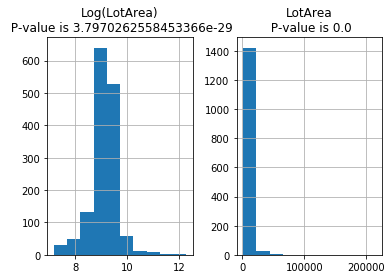

In [33]:
# Checking distribution of prices and log(LotArea)

p_value_before = shapiro(train["LotArea"])[1]
p_value_after = shapiro(np.log(train["LotArea"]))[1]
graph_data = pd.DataFrame(
        {
            ("LotArea\n P-value is " + str(p_value_before)) : train["LotArea"],
            ("Log(LotArea)\n P-value is " + str(p_value_after)) : np.log(train["LotArea"])
        }
    )
graph_data.hist()

# Trying polynomial fitting treatment

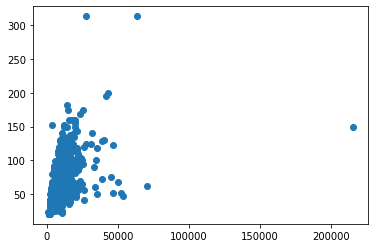

In [34]:
x_LotArea = data.loc[np.logical_not(data["LotFrontage"].isnull()), "LotArea"]
y_LotFrontage = data.loc[np.logical_not(data["LotFrontage"].isnull()), "LotFrontage"]

plt.scatter(x_LotArea, y_LotFrontage)

q = (x_LotArea <= 25000) & (y_LotFrontage <= 150)
w = np.polyfit(x_LotArea[q], y_LotFrontage[q], 1)
data.loc[data.LotFrontage.isnull(), 'LotFrontage'] = \
np.polyval(w, data.loc[data['LotFrontage'].isnull(), 'LotArea'])

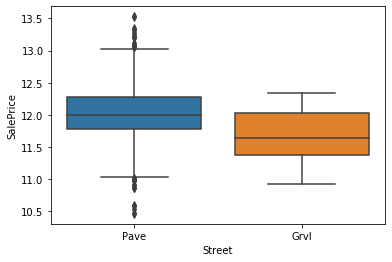

In [35]:
# Checking street

sns.boxplot(x='Street', y='SalePrice', data=train)
data = data.replace(
    {
        'Street': {'Pave': 1, 'Grvl': 0 }
    }
)

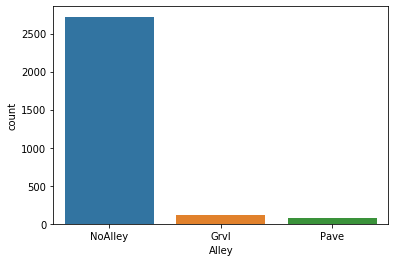

In [36]:
# Checking for alley
data.loc[data.Alley.isnull(), 'Alley'] = 'NoAlley'
sns.countplot(x='Alley', data=data)

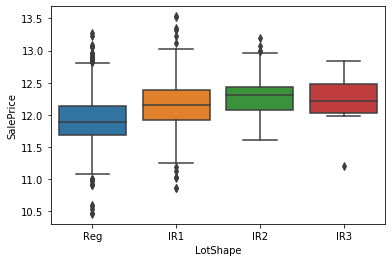

In [37]:
# For LotShape
sns.boxplot(x='LotShape', y='SalePrice', data=train)

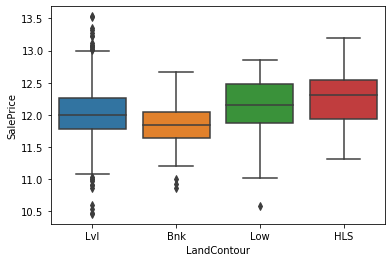

In [38]:
# For LandContour
sns.boxplot(x='LandContour', y='SalePrice', data=train)

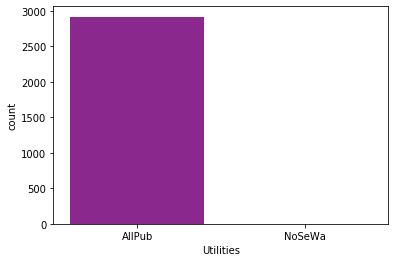

In [39]:
# Imputing Utilities
sns.countplot(x='Utilities', data=data, palette="plasma")
data.loc[data.Utilities.isnull(), 'Utilities'] = data.loc[:, 'Utilities'].mode()[0]
data = data.replace(
    {
        'Utilities': { 'AllPub': 1, 'NoSeWa': 0,
        }
    }
)

In [40]:
# Checking LotConfig
data.loc[data.LotConfig.isnull(), 'LotConfig']

Series([], Name: LotConfig, dtype: object)

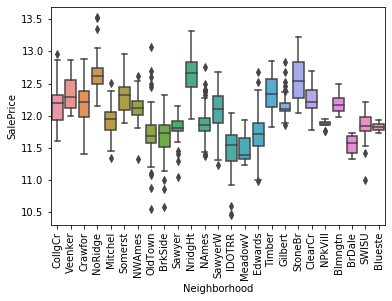

In [41]:
# Checking neighborhood
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
xt = plt.xticks(rotation=90)

In [42]:
# For Reward good neighborhoods
NeighborhoodReward = pd.DataFrame(np.zeros((data.shape[0], 1)), columns=['NeighborhoodReward'])
NeighborhoodReward.loc[data.Neighborhood == 'StoneBr', 'NeighborhoodReward'] = 1
NeighborhoodReward.loc[data.Neighborhood == 'NridgHt', 'NeighborhoodReward'] = 1
NeighborhoodReward.loc[data.Neighborhood == 'NoRidge', 'NeighborhoodReward'] = 1
data['NeighborhoodReward'] = NeighborhoodReward

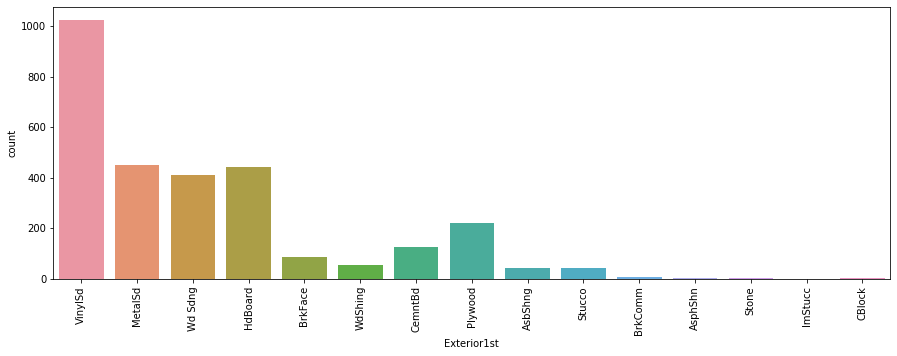

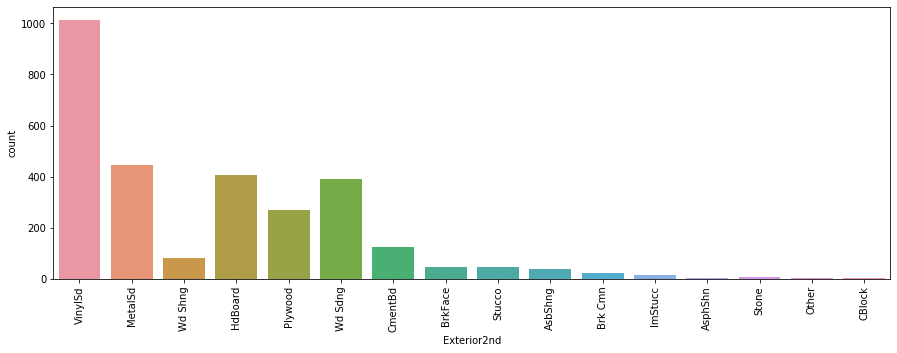

In [43]:
# Imputing Exterior1st, Exterior2nd
plt.figure(figsize = (15, 5))
sns.countplot(x='Exterior1st', data=data)
xt = plt.xticks(rotation=90)
plt.figure(figsize = (15, 5))
sns.countplot(x='Exterior2nd', data=data)
xt = plt.xticks(rotation=90)
data.loc[data.Exterior1st.isnull(), 'Exterior1st'] = data.loc[:, 'Exterior1st'].mode()[0]
data.loc[data.Exterior2nd.isnull(), 'Exterior2nd'] = data.loc[:, 'Exterior2nd'].mode()[0]

In [44]:
# Checking if house has been remodelled after buying.
ChkRemodelled = pd.DataFrame(np.zeros((data.shape[0],1)), columns=['IsRemodelled'])
ChkRemodelled[data.YrSold <= data.YearRemodAdd] = 1

# For memory efficiency
ChkRemodelled = ChkRemodelled.to_sparse()
data['IsRemodelled'] = ChkRemodelled

C:\Users\Farzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  


In [45]:
# Checking if house has been sold in the same year as it was built.
ChkSameSoldBuilt = pd.DataFrame(np.zeros((data.shape[0],1)), columns=['IsSameSoldBuilt'])
ChkSameSoldBuilt[data.YearBuilt >= data.YrSold] = 1

# For memory efficiency
ChkSameSoldBuilt = ChkSameSoldBuilt.to_sparse()
data['IsSameSoldBuilt'] = ChkSameSoldBuilt

C:\Users\Farzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  


In [46]:
# for modeling inflation / change in trend of prices 
data.YrSold = data.loc[:, "YrSold"].max() - data.YrSold

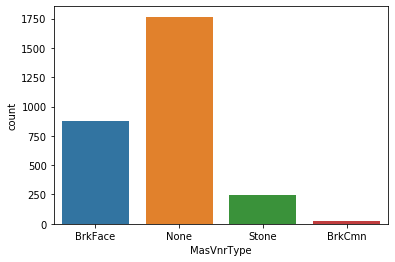

In [47]:
# Imputing masVnrType
data.loc[data.MasVnrType.isnull(), 'MasVnrType'] = 'None'
sns.countplot(x='MasVnrType', data=data)
data.loc[data.MasVnrType == 'None', 'MasVnrArea'] = 0

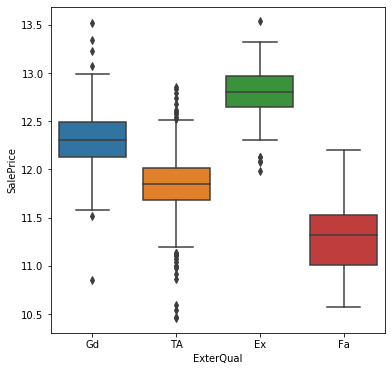

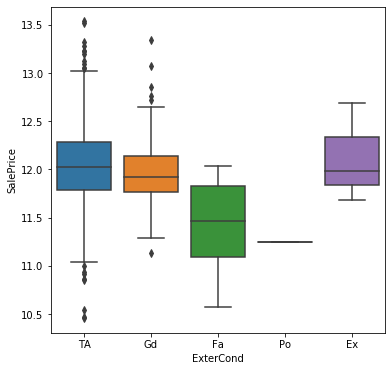

In [48]:
# Checking ExterQual, ExterCond for missing values
plt.figure(figsize = (6, 6))
sns.boxplot(x='ExterQual', y='SalePrice', data=train)
plt.figure(figsize = (6, 6))
sns.boxplot(x='ExterCond', y='SalePrice', data=train)
data = data.replace(
    {
        'ExterQual': {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1
                     },
        'ExterCond': {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1
                     }
    }
)

In [49]:
# treating the missing values
data.loc[data.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
data.loc[data.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
data.loc[data.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
data.loc[data.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
data.loc[data.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
data.loc[data.BsmtFinType1 == 'NoBsmt', 'BsmtFinSF1'] = 0
data.loc[data.BsmtFinType2 == 'NoBsmt', 'BsmtFinSF2'] = 0
data.loc[data.BsmtQual == 'NoBsmt', 'BsmtUnfSF'] = 0
data.loc[data.BsmtQual == 'NoBsmt', 'TotalBsmtSF'] = 0
data = data.replace(
    {
        'BsmtExposure': { 'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'NoBsmt': 0 },
        'BsmtCond': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBsmt': 0 },
    }
)

In [50]:
data = data.replace(
    {
        'HeatingQC': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 },
        'CentralAir': { 'Y': 1, 'N': 0 }
    }
)

In [51]:
# Treating missing values to mode.
data.loc[data.Electrical.isnull(), 'Electrical'] = data.loc[:, 'Electrical'].mode()[0]

data.loc[data.KitchenQual.isnull(), 'KitchenQual'] = data.loc[:, 'KitchenQual'].mode()[0]
data = data.replace(
    {
        'KitchenQual': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 }
    }
)

data.loc[data.Functional.isnull(), 'Functional'] = 'Typ'
data = data.replace(
    {
        'Functional': { 'Typ': 0, 'Min1': 1, 'Min2': 1, 'Mod': 2, 'Maj1': 3, 'Maj2': 4, 'Sev': 5, 'Sal': 6 }
    }
)



In [52]:
# Treating missing values to 0
data.loc[data.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
data.loc[data.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0

In [53]:
#  Treat missing value 
data.loc[data.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'
data = data.replace(
    {
        'FireplaceQu': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoFireplace': 0 }
    }
)

In [54]:
# Treat missing value to new value
data.loc[data.GarageType.isnull(), 'GarageType'] = 'NoGarage'
data.loc[data.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
data.loc[data.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
data.loc[data.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
data.loc[data.GarageYrBlt.isnull(), 'GarageYrBlt'] = 'NoGarage'
data = data.replace(
    {
        'GarageQual': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0 },
        'GarageCond': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0 },
    }
)

In [55]:
# For following variables
data = data.replace(
    {
        'PavedDrive': { 'Y': 1, 'P': 0.5, 'N': 0 }
    }
)

# Treat missing value
data.loc[data['PoolQC'].isnull(), 'PoolQC'] = 'NoPool'
data.loc[data['Fence'].isnull(), 'Fence'] = 'NoFence'
data = data.replace(
    {
        'PoolQC': { 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 },
        'Fence': { 'GdPrv': 2, 'MnPrv': 1, 'GdWo': 2, 'MnWw': 1, 'NoFence': 0 }
    }
)

data.loc[data['MiscFeature'].isnull(), 'MiscFeature'] = 'None'
data.loc[data['SaleType'].isnull(), 'SaleType'] = data.loc[:, 'SaleType'].mode()[0]

In [56]:
data.loc[data['GarageCars'].isnull(), 'GarageCars'] = data.loc[data.GarageType == 'Detchd', 'GarageCars'].median()
data.loc[data['GarageArea'].isnull(), 'GarageArea'] = data.loc[data.GarageType == 'Detchd', 'GarageArea'].mean()

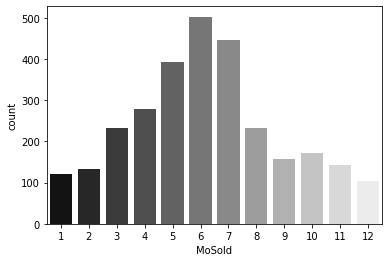

In [57]:
sns.countplot(x='MoSold', data=data, palette="gray")
SellingSeason = data.MoSold.replace(
    { 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0 }
)
data['SellingSeason'] = SellingSeason

# Changing months to numeric values
data = data.replace(
    {
        'MoSold': { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',  6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    }
)

In [58]:
# Standardizing values

# ExterQual
IsExterQualGood = data.ExterQual.copy()
IsExterQualGood[IsExterQualGood <= 2] = 0
IsExterQualGood[IsExterQualGood > 2] = 1
data['IsExterQualGood'] = IsExterQualGood
IsExterQualPoor = data.ExterQual.copy()
IsExterQualPoor[IsExterQualPoor <= 2] = 1
IsExterQualPoor[IsExterQualPoor > 2] = 0
data['IsExterQualPoor'] = IsExterQualPoor
# ExterCond
IsExterCondGood = data.ExterCond.copy()
IsExterCondGood[IsExterCondGood <= 2] = 0
IsExterCondGood[IsExterCondGood > 2] = 1
data['IsExterCondGood'] = IsExterCondGood
IsExterCondPoor = data.ExterCond.copy()
IsExterCondPoor[IsExterCondPoor <= 2] = 1
IsExterCondPoor[IsExterCondPoor > 2] = 0
data['IsExterCondPoor'] = IsExterCondPoor
# OverallQual
IsOverallQualGood = data.OverallQual.copy()
IsOverallQualGood[IsOverallQualGood <= 5] = 0
IsOverallQualGood[IsOverallQualGood > 5] = 1
data['IsOverallQualGood'] = IsOverallQualGood
IsOverallQualPoor = data.OverallQual.copy()
IsOverallQualPoor[IsOverallQualPoor <= 5] = 1
IsOverallQualPoor[IsOverallQualPoor > 5] = 0
data['IsOverallQualPoor'] = IsOverallQualPoor
# BsmtCond
IsBsmtCondGood = data.BsmtCond.copy()
IsBsmtCondGood[IsBsmtCondGood <= 3] = 0
IsBsmtCondGood[IsBsmtCondGood > 3] = 1
data['IsBsmtCondGood'] = IsBsmtCondGood
IsBsmtCondPoor = data.BsmtCond.copy()
IsBsmtCondPoor[IsBsmtCondPoor <= 3] = 1
IsBsmtCondPoor[IsBsmtCondPoor > 3] = 0
data['IsBsmtCondPoor'] = IsBsmtCondPoor
# OverallCond
IsOverallCondGood = data.OverallCond.copy()
IsOverallCondGood[IsOverallCondGood <= 5] = 0
IsOverallCondGood[IsOverallCondGood > 5] = 1
data['IsOverallCondGood'] = IsOverallCondGood
IsOverallCondPoor = data.OverallCond.copy()
IsOverallCondPoor[IsOverallCondPoor <= 5] = 1
IsOverallCondPoor[IsOverallCondPoor > 5] = 0
data['IsOverallCondPoor'] = IsOverallCondPoor
# GarageCond
IsGarageCondGood = data.GarageCond.copy()
IsGarageCondGood[IsGarageCondGood <= 3] = 0
IsGarageCondGood[IsGarageCondGood > 3] = 1
data['IsGarageCondGood'] = IsGarageCondGood
IsGarageCondPoor = data.GarageCond.copy()
IsGarageCondPoor[IsGarageCondPoor <= 3] = 1
IsGarageCondPoor[IsGarageCondPoor > 3] = 0
data['IsGarageCondPoor'] = IsGarageCondPoor
# GarageQual
IsGarageQualGood = data.GarageQual.copy()
IsGarageQualGood[IsGarageQualGood <= 3] = 0
IsGarageQualGood[IsGarageQualGood > 3] = 1
data['IsGarageQualGood'] = IsGarageQualGood
IsGarageQualPoor = data.GarageQual.copy()
IsGarageQualPoor[IsGarageQualPoor <= 3] = 1
IsGarageQualPoor[IsGarageQualPoor > 3] = 0
data['IsGarageQualPoor'] = IsGarageQualPoor
# KitchenQual
IsKitchenQualGood = data.KitchenQual.copy()
IsKitchenQualGood[IsKitchenQualGood <= 2] = 0
IsKitchenQualGood[IsKitchenQualGood > 2] = 1
data['IsKitchenQualGood'] = IsKitchenQualGood
IsKitchenQualPoor = data.KitchenQual.copy()
IsKitchenQualPoor[IsKitchenQualPoor <= 2] = 1
IsKitchenQualPoor[IsKitchenQualPoor > 2] = 0
data['IsKitchenQualPoor'] = IsKitchenQualPoor
# SaleCondition
IsSaleConditionPoor = data.SaleCondition.copy()
IsSaleConditionPoor[IsSaleConditionPoor == "Normal"] = 0
IsSaleConditionPoor[IsSaleConditionPoor == "Partial"] = 0
IsSaleConditionPoor[IsSaleConditionPoor == "Abnorml"] = 1
IsSaleConditionPoor[IsSaleConditionPoor == "Alloca"] = 1
IsSaleConditionPoor[IsSaleConditionPoor == "AdjLand"] = 1
IsSaleConditionPoor[IsSaleConditionPoor == "Family"] = 1
data['IsSaleConditionPoor'] = IsSaleConditionPoor
# HeatingQC
IsHeatingQCPoor = data.HeatingQC.copy()
IsHeatingQCPoor[IsHeatingQCPoor <= 2] = 1
IsHeatingQCPoor[IsHeatingQCPoor > 2] = 0
data['IsHeatingQCPoor'] = IsHeatingQCPoor
# MasVnr 
IsMasVnrTypePresent = data.MasVnrType.copy()
IsMasVnrTypePresent[IsMasVnrTypePresent == "None"] = 0
IsMasVnrTypePresent[IsMasVnrTypePresent != 0] = 1
data['IsMasVnrTypePresent'] = IsMasVnrTypePresent

In [59]:
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = True, inplace = True)
print(corr.SalePrice)

EnclosedPorch   -0.149050
KitchenAbvGr    -0.147548
MSSubClass      -0.073959
LowQualFinSF    -0.037963
YrSold          -0.037263
OverallCond     -0.036868
MiscVal         -0.020021
Id              -0.017942
BsmtHalfBath    -0.005149
BsmtFinSF2       0.004832
3SsnPorch        0.054900
MoSold           0.057329
PoolArea         0.069798
ScreenPorch      0.121208
BedroomAbvGr     0.209044
BsmtUnfSF        0.221985
BsmtFullBath     0.236224
LotArea          0.257320
HalfBath         0.313982
2ndFlrSF         0.319300
OpenPorchSF      0.321053
WoodDeckSF       0.334135
LotFrontage      0.355878
BsmtFinSF1       0.372023
MasVnrArea       0.430809
Fireplaces       0.489449
TotRmsAbvGrd     0.534422
GarageYrBlt      0.541073
YearRemodAdd     0.565608
YearBuilt        0.586570
FullBath         0.594771
1stFlrSF         0.596981
TotalBsmtSF      0.612134
GarageArea       0.650888
GarageCars       0.680625
GrLivArea        0.700927
OverallQual      0.817184
SalePrice        1.000000
Name: SalePr

# Finding important features 

In [60]:
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.017942,-0.073959,0.355878,0.257320,0.817184,-0.036868,0.586570,0.565608,0.430809,0.372023,...,0.334135,0.321053,-0.149050,0.054900,0.121208,0.069798,-0.020021,0.057329,-0.037263,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.700927
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.680625
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.650888
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.612134
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.596981
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.594771
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608


# visualizing using pairplot

C:\Users\Farzana\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Farzana\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


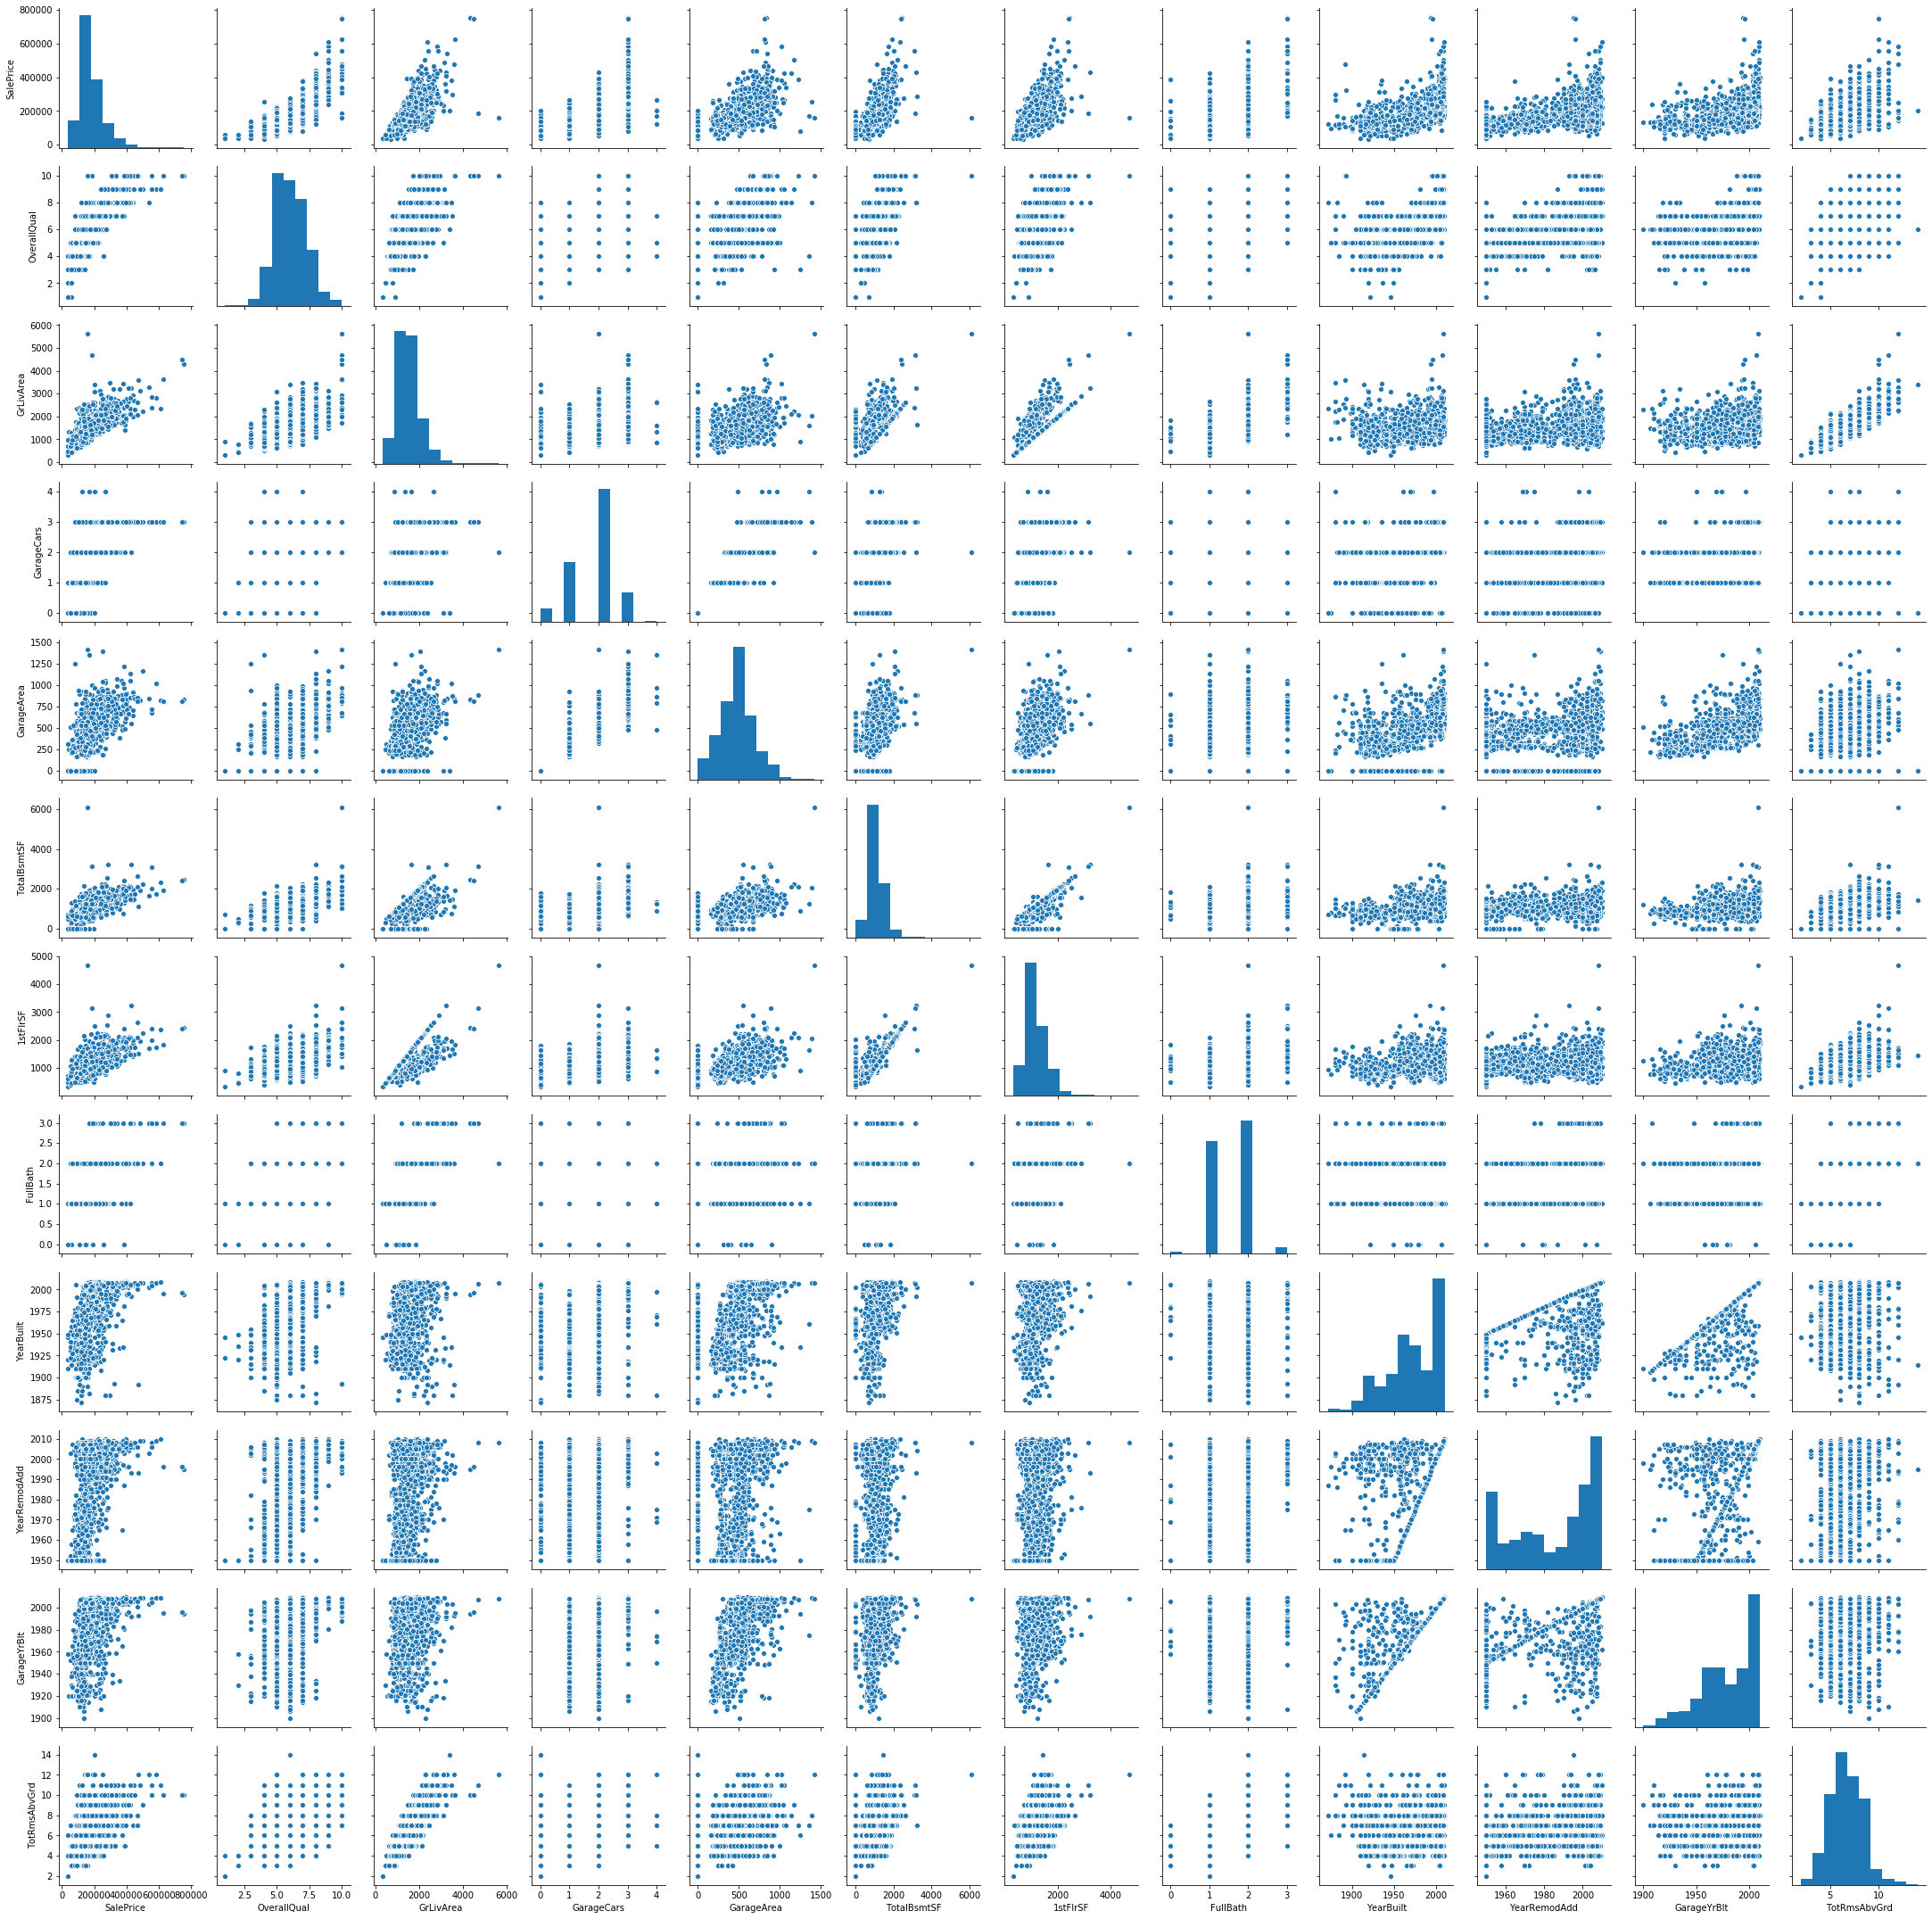

In [61]:
corr = train.corr()
top_corr_cols = corr[abs((corr.SalePrice)>=.26)].SalePrice.sort_values(ascending=False).keys()
b = sns.pairplot(entire_data.loc[entire_data.SalePrice>0, top_corr_cols[:12]])

In [62]:
# Creating new features

data["1stFlrSF-s2"] = data["1stFlrSF"] ** 2
data["1stFlrSF-s3"] = data["1stFlrSF"] ** 3
data["1stFlrSF-Sq"] = np.sqrt(data["1stFlrSF"])
data["GarageCars-s2"] = data["GarageCars"] ** 2
data["GarageCars-s3"] = data["GarageCars"] ** 3
data["GarageCars-Sq"] = np.sqrt(data["GarageCars"])
data["GrLivArea-s2"] = data["GrLivArea"] ** 2
data["GrLivArea-s3"] = data["GrLivArea"] ** 3
data["GrLivArea-Sq"] = np.sqrt(data["GrLivArea"])
data["FullBath-s2"] = data["FullBath"] ** 2
data["FullBath-s3"] = data["FullBath"] ** 3
data["FullBath-Sq"] = np.sqrt(data["FullBath"])
data["GarageArea-s2"] = data["GarageArea"] ** 2
data["GarageArea-s3"] = data["GarageArea"] ** 3
data["GarageArea-Sq"] = np.sqrt(data["GarageArea"])
data["YearBuilt-s2"] = data["YearBuilt"] ** 2
data["YearBuilt-s3"] = data["YearBuilt"] ** 3
data["YearBuilt-Sq"] = np.sqrt(data["YearBuilt"])
data["YearRemodAdd-s2"] = data["YearRemodAdd"] ** 2
data["YearRemodAdd-s3"] = data["YearRemodAdd"] ** 3
data["YearRemodAdd-Sq"] = np.sqrt(data["YearRemodAdd"])
data["TotalBsmtSF-s2"] = data["TotalBsmtSF"] ** 2
data["TotalBsmtSF-s3"] = data["TotalBsmtSF"] ** 3
data["TotalBsmtSF-Sq"] = np.sqrt(data["TotalBsmtSF"])
data["OverallQual-s2"] = data["OverallQual"] ** 2
data["OverallQual-s3"] = data["OverallQual"] ** 3
data["OverallQual-Sq"] = np.sqrt(data["OverallQual"])

# Translate years to  categorical variables

In [63]:
year_mapping = pd.concat(pd.Series('YearGroup' + str(i+1), index=range(1871 + i*20, 1891 + i*20)) for i in range(0, 7))
data.GarageYrBlt = data.GarageYrBlt.map(year_mapping)
data.YearBuilt = data.YearBuilt.map(year_mapping)
data.YearRemodAdd = data.YearRemodAdd.map(year_mapping)

In [64]:
# Predicting Classes of SalePrice (SalePrice Groups) using SVM.
predict_class_col = ['Exterior1st', 'Exterior2nd', 'RoofMatl', 'Condition1', 'Condition2', 'BldgType']
svm = SVC(C=100)

In [65]:
# Three price categories (based on histogram of SalePrice)
pred_class = pd.Series(np.zeros(train.shape[0]))
pred_class[np.exp(train.SalePrice) < 150000] = 'pc1'
pred_class[np.exp(train.SalePrice) >= 150000] = 'pc2'
pred_class[np.exp(train.SalePrice) >= 220000] = 'pc3'

In [66]:
# dummies
pred_class_data = pd.get_dummies(train.loc[:, predict_class_col], sparse=True)
# Train
svm.fit(pred_class_data, pred_class)

C:\Users\Farzana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [67]:
# Predict
SalePriceGrp = pd.DataFrame(np.zeros((data.shape[0],1)), columns=['SalePriceGrp'])
pred_class_data = pd.get_dummies(data.loc[:, predict_class_col], sparse=True)
pc_pred = svm.predict(pred_class_data)
SalePriceGrp[pc_pred=='pc2'] = 1
SalePriceGrp[pc_pred=='pc3'] = 2
SalePriceGrp = SalePriceGrp.to_sparse()
data["SalePriceGrp"] = SalePriceGrp

C:\Users\Farzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  import sys


In [68]:
numeric_features = data.dtypes[data.dtypes != "object"].index

In [69]:
# Using log transform to skew numeric features
skewed_feat_1 = data[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_feat_1 = skewed_feat_1[skewed_feat_1 > 0.2]
skewed_feat_1 = skewed_feat_1.index
data[skewed_feat_1] = np.log1p(data[skewed_feat_1])

In [70]:
#dummies for remaining categorical features
processed_data = pd.get_dummies(data)

# Droping features which are overfitting

In [71]:
processed_data = processed_data.drop('RoofMatl_ClyTile', axis=1) 
processed_data = processed_data.drop('Condition2_PosN', axis=1) 
processed_data = processed_data.drop('MSZoning_C (all)', axis=1)
processed_data = processed_data.drop('MSSubClass_MSSubClass_160', axis=1)

In [72]:
def poly(X):
    areas = ['BsmtUnfSF','LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']
    qualities = chain(
        ['IsOverallQualPoor', 'IsOverallQualGood','IsBsmtCondPoor', 'IsBsmtCondGood', 'IsGarageQualPoor', 'IsGarageQualGood', 'IsOverallCondPoor', 'IsOverallCondGood',
         'IsExterQualPoor', 'IsExterQualGood', 'IsExterCondPoor','IsGarageCondPoor', 'IsGarageCondGood', 'IsKitchenQualPoor', 'IsKitchenQualGood' 'IsExterCondGood', 
        ],
        
        ['GarageCond', 'KitchenQual', 'HeatingQC','OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'GarageQual',
          'IsHeatingQCPoor', 'IsSaleConditionPoor', 'IsRemodelled', 'IsSameSoldBuilt''IsMasVnrTypePresent',
        ]
    )
    for area, quality in product(areas, qualities):
        temp = X.loc[:, [area, quality]].prod(1)
        temp.name = area + '_' + quality
        yield temp

temp_data = pd.concat(poly(processed_data), axis=1)
processed_data = pd.concat((processed_data, temp_data), axis=1)

C:\Users\Farzana\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [73]:
# Get train_processed for additional analysis
processed_train = processed_data[:train.shape[0]]
processed_train["SalePrice"] = train["SalePrice"]
corr = processed_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)

C:\Users\Farzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
processed_data.shape

(2919, 495)

In [75]:
# Finding the most important features

processed_data["LotArea_ExterQual-s2"] = processed_data["LotArea_ExterQual"] ** 2
processed_data["LotArea_ExterQual-s3"] = processed_data["LotArea_ExterQual"] ** 3
processed_data["LotArea_ExterQual-Sq"] = np.sqrt(processed_data["LotArea_ExterQual"])
processed_data["LotArea_KitchenQual-s2"] = processed_data["LotArea_KitchenQual"] ** 2
processed_data["LotArea_KitchenQual-s3"] = processed_data["LotArea_KitchenQual"] ** 3
processed_data["LotArea_KitchenQual-Sq"] = np.sqrt(processed_data["LotArea_KitchenQual"])
processed_data["LotArea_OverallQual-s2"] = processed_data["LotArea_OverallQual"] ** 2
processed_data["LotArea_OverallQual-s3"] = processed_data["LotArea_OverallQual"] ** 3
processed_data["LotArea_OverallQual-Sq"] = np.sqrt(processed_data["LotArea_OverallQual"])
processed_data["OverallQual-s2"] = processed_data["OverallQual"] ** 2
processed_data["OverallQual-s3"] = processed_data["OverallQual"] ** 3
processed_data["OverallQual-Sq"] = np.sqrt(processed_data["OverallQual"])
processed_data["GrLivArea_ExterQual-s2"] = processed_data["GrLivArea_ExterQual"] ** 2
processed_data["GrLivArea_ExterQual-s3"] = processed_data["GrLivArea_ExterQual"] ** 3
processed_data["GrLivArea_ExterQual-Sq"] = np.sqrt(processed_data["GrLivArea_ExterQual"])
processed_data["GarageArea_OverallQual-s2"] = processed_data["GarageArea_OverallQual"] ** 2
processed_data["GarageArea_OverallQual-s3"] = processed_data["GarageArea_OverallQual"] ** 3
processed_data["GarageArea_OverallQual-Sq"] = np.sqrt(processed_data["GarageArea_OverallQual"])
processed_data["GrLivArea_KitchenQual-s2"] = processed_data["GrLivArea_KitchenQual"] ** 2
processed_data["GrLivArea_KitchenQual-s3"] = processed_data["GrLivArea_KitchenQual"] ** 3
processed_data["GrLivArea_KitchenQual-Sq"] = np.sqrt(processed_data["GrLivArea_KitchenQual"])
processed_data["GrLivArea_OverallQual-s2"] = processed_data["GrLivArea_OverallQual"] ** 2
processed_data["GrLivArea_OverallQual-s3"] = processed_data["GrLivArea_OverallQual"] ** 3
processed_data["GrLivArea_OverallQual-Sq"] = np.sqrt(processed_data["GrLivArea_OverallQual"])
processed_data["TotalBsmtSF_OverallQual-s2"] = processed_data["TotalBsmtSF_OverallQual"] ** 2
processed_data["TotalBsmtSF_OverallQual-s3"] = processed_data["TotalBsmtSF_OverallQual"] ** 3
processed_data["TotalBsmtSF_OverallQual-Sq"] = np.sqrt(processed_data["TotalBsmtSF_OverallQual"])

# Split back data to train and test

In [76]:
processed_train = processed_data[:train.shape[0]]
processed_test = processed_data[train.shape[0]:]

# Checkking for outliers

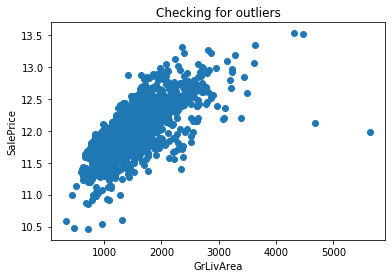

In [77]:
plt.scatter(train.GrLivArea, train.SalePrice)
plt.title("Checking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [78]:
processed_train = processed_train.drop([523, 1298, 691, 1182])

In [79]:
train = train.drop([523, 1298, 691, 1182])

In [80]:
def learning_to_iterate():
    augment_train = processed_train.copy()
    augment_train["SalePrice"] = train["SalePrice"]
    randomised_train = augment_train
    first_70percent = ceil(randomised_train.shape[0]*0.7)
    learning_train = randomised_train[:first_70percent]
    validation_train = randomised_train[first_7per0cent:]

    # Applying Lasso model here-- at alpha=0.00055
    lasso_model = Lasso(alpha=5.5e-4,
                        max_iter=200000).fit(
                                            learning_train.ix[:, learning_train.columns != "SalePrice"],
                                            learning_train["SalePrice"]
                                            )
    
    predictions = lasso_model.predict(validation_train.ix[:, learning_train.columns != "SalePrice"])
    rmse = np.sqrt(mean_squared_error(validation_train["SalePrice"], predictions))
    return rmse

In [81]:
learning_to_iterate()

C:\Users\Farzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Farzana\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\Farzana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.828152772215862, tolerance: 0.016536883485165046
  positive)
C:\Users\Farzana\Anaconda3\lib\s

0.10931888763724219

In [82]:
# Apply Lasso model-- at alpha=0.00055
lasso_model = Lasso(alpha=5.5e-4, max_iter=100000).fit(processed_train, train["SalePrice"])
predictions = np.exp(lasso_model.predict(processed_test))
solution = pd.DataFrame(
    {
        "Id" : test.Id,
        "SalePrice" : predictions
    }, 
    columns=['Id', 'SalePrice']
)
solution.to_csv("f_lasso_sol.csv", index = False)

C:\Users\Farzana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.344152224647743, tolerance: 0.02282593004604854
  positive)


In [83]:
# Apply xgb model, gamma check later
import xgboost as xgb

def learning_to_iterate():
    augment_train = processed_train.copy()
    augment_train["SalePrice"] = train["SalePrice"]
    randomised_train = augment_train.iloc[np.random.permutation(augment_train.shape[0])]
    first_70percent = ceil(randomised_train.shape[0]*0.7)
    learning_train = randomised_train[:first_70percent]
    validation_train = randomised_train[first_70percent:]

    
    xgb_model = xgb.XGBRegressor(
                                 n_estimators=360,
                                 max_depth=2,
                                 learning_rate=0.1).fit(
                                                        learning_train.ix[:, learning_train.columns != "SalePrice"],
                                                        learning_train["SalePrice"]
                                                       ) 
    
    predictions = xgb_model.predict(validation_train.ix[:, learning_train.columns != "SalePrice"])
    rmse = np.sqrt(mean_squared_error(validation_train["SalePrice"], predictions))
    
    return rmse

In [84]:
learning_to_iterate()

C:\Users\Farzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\Farzana\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\Farzana\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


0.11948743343284708

C:\Users\Farzana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.344152224647743, tolerance: 0.02282593004604854
  positive)


Text(0.5, 1.0, 'Coefficients given in the Model')

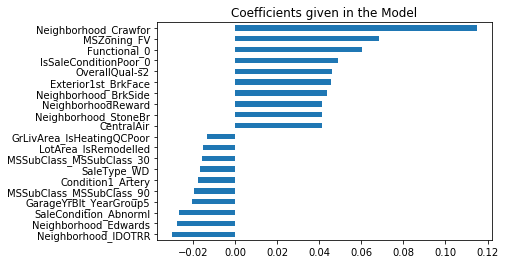

In [88]:
#try_model_lasso = lasso_model = Lasso(alpha=5.5e-4, max_iter=70000).fit(processed_train, train["SalePrice"])
try_lasso_model = Lasso(alpha=5.5e-4, max_iter=100000).fit(processed_train, train["SalePrice"])
coef = pd.Series(try_lasso_model.coef_, index = processed_train.columns).sort_values()
cru_coef = pd.concat([coef.head(10), coef.tail(10)])
cru_coef.plot(kind = "barh")
plt.title("Coefficients given in the Model")

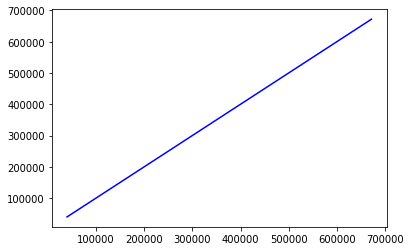

In [99]:
x_pred = np.expm1(try_lasso_model.predict(processed_train))
y = np.expm1(try_lasso_model.predict(processed_test))
plt.plot([min(x_pred),max(x_pred)], [min(x_pred),max(x_pred)], c="blue")

In [102]:
p = np.expm1(try_lasso_model.predict(processed_test))
solution = pd.DataFrame({"id":test.Id, "SalePrice":p}, columns=['id', 'SalePrice'])
solution.to_csv("farz_lasso_solution_final.csv", index = False)